# Spaceship Titanic
## Chris Porter
### Introduction
Welcome to the year 2912. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

The following data information is provided:
*PassengerId* - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

*HomePlanet* - The planet the passenger departed from, typically their planet of permanent residence.

*CryoSleep* - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

*Cabin* - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

*Destination* - The planet the passenger will be debarking to.

*Age* - The age of the passenger.

*VIP* - Whether the passenger has paid for special VIP service during the voyage.

*RoomService, FoodCourt, ShoppingMall, Spa, VRDeck* - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

*Name* - The first and last names of the passenger.

*Transported* - Target variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to determine if string element is NaN
def isNaN(string):
    return string != string

In [2]:
# Load Data
data = pd.read_csv('./data/train.csv')

## EDA

In [3]:
# Display first 10 rows
print(data.head(10))
# Number of records
print(data.shape)
# Data Structure
print(str(data))

# Convert Transported to numeric boolean
data['Transported'] = data['Transported'].astype(int)

  PassengerId HomePlanet CryoSleep  Cabin    Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P    TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S    TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S    TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S    TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S    TRAPPIST-1e  16.0  False   
5     0005_01      Earth     False  F/0/P  PSO J318.5-22  44.0  False   
6     0006_01      Earth     False  F/2/S    TRAPPIST-1e  26.0  False   
7     0006_02      Earth      True  G/0/S    TRAPPIST-1e  28.0  False   
8     0007_01      Earth     False  F/3/S    TRAPPIST-1e  35.0  False   
9     0008_01     Europa      True  B/1/P    55 Cancri e  14.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck                Name  \
0          0.0        0.0           0.0     0.0     0.0     Maham Ofracculy   
1        109.0        9.0          25.

In [4]:
# Examine Target Variable Distribution
print(data['Transported'].value_counts())  
# Target Variable is evenly distributed

# Correlation
print(data.corr(numeric_only=True))  
# None of the numeric variables are strongly correlated with target variable before transformation

# Check for missing values
print(data.isnull().sum())  
# Approximately 200 values missing in each of the columns

1    4378
0    4315
Name: Transported, dtype: int64
                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported  -0.075026    -0.244611   0.046566      0.010141 -0.221131   

                VRDeck  Transported  
Age           0.101007    -0.075026  
RoomService  -0.019581    -0.244611  
FoodCourt     0.227995     0.046566  
ShoppingMall -0.007322     0.010141  
Spa           0.153821    -0.221131  
VRDeck        1.000000    -0.207075  
Transported  -0.207075     1.000000  
PassengerId       0
HomePlanet      201
CryoSleep  

*PassengerId* might not be informative, but does contain information about whether the passenger is travelling with others or not.

In [5]:
# Extract PassengerGroup from PassengerId
data['PassengerGroup'] = data.PassengerId.str[:4]
# Calculate PartySize
partySize = data['PassengerGroup'].value_counts()
data = pd.merge(data, partySize, left_on=data['PassengerGroup'], right_index=True, how='inner')\
                    .drop('key_0', axis=1)\
                    .rename(columns={'PassengerGroup_x':'PassengerGroup','PassengerGroup_y':'PartySize'})

In [6]:
# Examine HomePlanet
print(data['HomePlanet'].value_counts())
# 3 HomePlanets
# Categorical Data

print(data.groupby(['HomePlanet','Transported']).size())

# Plot HomePlanet in relation to target variable
# It is assumed that parties travelling together are from the same HomePlanet and have the same Destination
for i in data.index:
    if isNaN(data['HomePlanet'][i]):
        if isNaN(data['Destination'][i]):
            if data['PassengerGroup'][i] == data['PassengerGroup'][i-1]:
                data.loc[i,'HomePlanet'] = data['HomePlanet'][i-1]
                data.loc[i,'Destination'] = data['Destination'][i-1]
            elif data['PassengerGroup'][i] == data['PassengerGroup'][i+1]:
                data.loc[i,'HomePlanet'] = data['HomePlanet'][i+1]
                data.loc[i,'Destination'] = data['Destination'][i+1] 
        else:
            if data['PassengerGroup'][i] == data['PassengerGroup'][i-1]:
                data.loc[i,'HomePlanet'] = data['HomePlanet'][i-1]
            elif data['PassengerGroup'][i] == data['PassengerGroup'][i+1]:
                data.loc[i,'HomePlanet'] = data['HomePlanet'][i+1]
    elif isNaN(data['Destination'][i]):
        if data['PassengerGroup'][i] == data['PassengerGroup'][i-1]:
                data.loc[i,'Destination'] = data['Destination'][i-1]
        elif data['PassengerGroup'][i] == data['PassengerGroup'][i+1]:
                data.loc[i,'Destination'] = data['Destination'][i+1]

# Replace remaining missing datapoints
data['HomePlanet'] = data['HomePlanet'].fillna('unknown')
data['Destination'] = data['Destination'].fillna('unknown')
planets = data.HomePlanet.unique()

# Being from Europa seems to influence target variable

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
HomePlanet  Transported
Earth       0              2651
            1              1951
Europa      0               727
            1              1404
Mars        0               839
            1               920
dtype: int64


In [7]:
# Examine Cryosleep
print(data['CryoSleep'].value_counts())

# Examine 217 missing values
data[(data['CryoSleep'].isnull()) & ((data['FoodCourt'] > 0)\
                                     | (data['ShoppingMall'] > 0)\
                                     | (data['Spa'] > 0)\
                                     | (data['VRDeck'] > 0))].count()
# 118 of the missing values can be imputed as False, because CryoSleep passengers woouldn't use the VIP services en route.
data.loc[((data['CryoSleep'].isnull()) & ((data['FoodCourt'] > 0) | (data['ShoppingMall'] > 0) | (data['Spa'] > 0) | (data['VRDeck'] > 0))), 'CryoSleep'] = False
print(data['CryoSleep'].isnull().sum(), ' missing values remain')  

#Replace missing values with 'unknown'
data['CryoSleep'] = ['unknown' if isNaN(x) else x for x in data.CryoSleep]

False    5439
True     3037
Name: CryoSleep, dtype: int64
99  missing values remain


In [8]:
# Cabin variable can be split into deck, cabin, and PortStarboard categorical variables



# Modify missing values to 'unknown'
data['Cabin'] = ['unknown' if isNaN(x) else x for x in data['Cabin']]

# Split the column 'Cabin' into Deck/Cabin/Side
CabinDF=data['Cabin'].str.split("/", n=-1, expand = True, regex=False)
data['Deck'],data['Cabin'],data['PortStarboard'] = CabinDF[0],\
                                                    ['unknown' if x == None else x for x in CabinDF[1]],\
                                                    ['unknown' if x == None else x for x in CabinDF[2]]


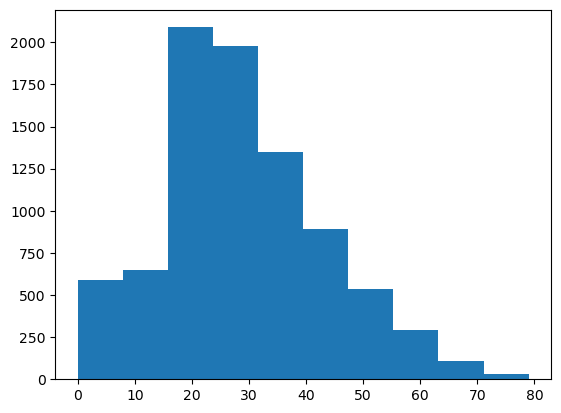

In [9]:
# Examine Age Distribution
plt.hist(data['Age'])
plt.show()

# missing values to be imputed as mean value
data['Age'] = [data['Age'].mean() if isNaN(x) else x for x in data.Age]

In [10]:
print(data['VIP'].value_counts())

# missing values to be imputed as False
data['VIP'] = [False if isNaN(x) else x for x in data.VIP]


False    8291
True      199
Name: VIP, dtype: int64


In [11]:
# missing  Name values to be replaced with unknown
data['Name'] = ['unknown' if isNaN(x) else x for x in data.Name]
# Name will not be used for prediction, but this allows for a cleaner dataFrame

The remaining missing variables are all continuous numerical variables.  They are the various onboard services rendered to passengers who are not in CryoSleep.

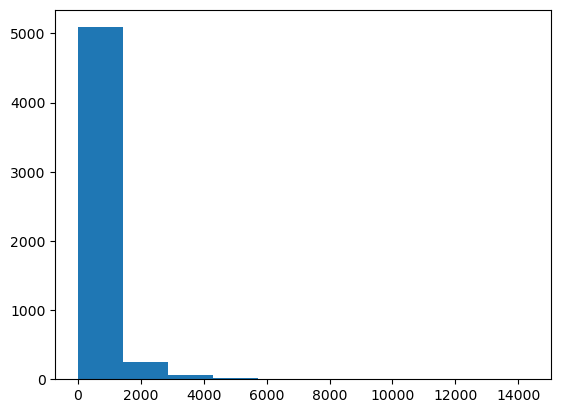

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64
median =  0.0


In [12]:
# RoomService
plt.hist(data['RoomService'][data['CryoSleep'] == False])
plt.show()

print(data.RoomService.describe())
print('median = ',data.RoomService.median())

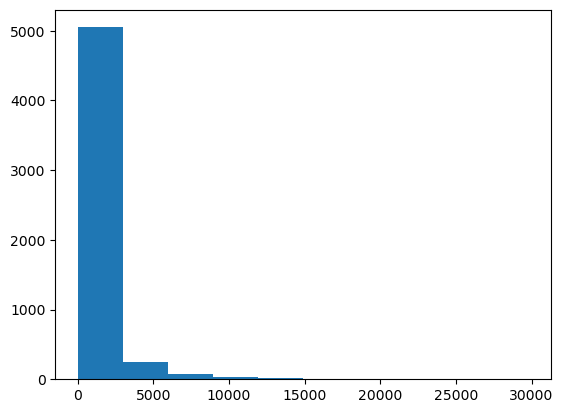

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64
median =  0.0


In [13]:
# FoodCourt
plt.hist(data['FoodCourt'][data['CryoSleep'] == False])
plt.show()

print(data.FoodCourt.describe())
print('median = ',data.FoodCourt.median())

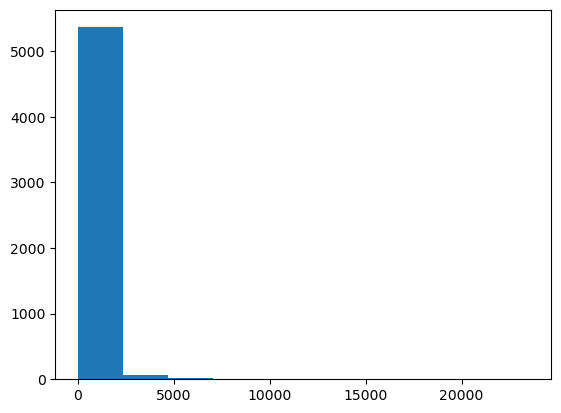

count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: ShoppingMall, dtype: float64
median =  0.0


In [14]:
# ShoppingMall
plt.hist(data['ShoppingMall'][data['CryoSleep'] == False])
plt.show()

print(data.ShoppingMall.describe())
print('median = ',data.ShoppingMall.median())

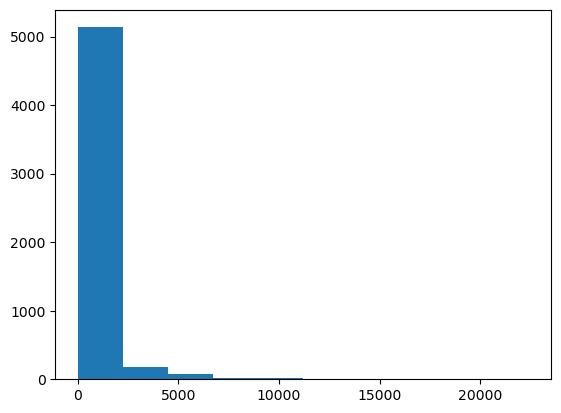

count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64
median =  0.0


In [15]:
# Spa
plt.hist(data['Spa'][data['CryoSleep'] == False])
plt.show()

print(data.Spa.describe())
print('median = ',data.Spa.median())

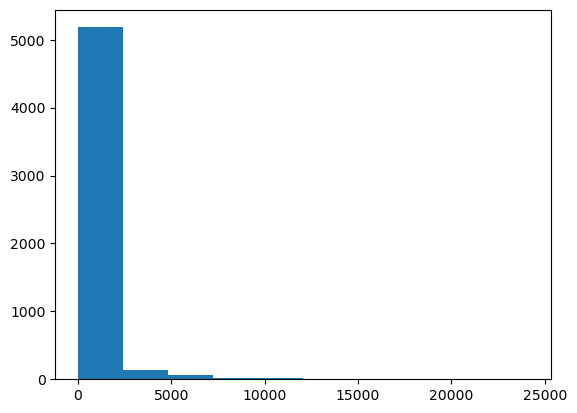

count     8505.000000
mean       304.854791
std       1145.717189
min          0.000000
25%          0.000000
50%          0.000000
75%         46.000000
max      24133.000000
Name: VRDeck, dtype: float64
median =  0.0


In [16]:
# VRDeck
plt.hist(data['VRDeck'][data['CryoSleep'] == False])
plt.show()

print(data.VRDeck.describe())
print('median = ',data.VRDeck.median())

Even excluding those in Cryosleep the number of passengers using the VIP services is very low, as are the amounts spent. Therefore, all missing values will be imputed as 0, regardless of CryoSleep status.

In [17]:
data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

In [18]:
# Check for missing values
print(data.isnull().sum())

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
PassengerGroup    0
PartySize         0
Deck              0
PortStarboard     0
dtype: int64


In [20]:
data.to_csv('./data/clean_train.csv')